# Demonstrate Nucleosome Clustering with the Sliding Nucleosome Model

Simulation of the sliding nucleosome model with the following parameters:

- Number of marks: 1
- Correlation in methylation pattern: FALSE
- Maximum number of binders per mark: 2

#### Specify Package Root Directory

In [1]:
import os
import sys

# Get the absolute path of the notebook's directory
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Navigate one level up to get the root directory path
root_directory = os.path.abspath(os.path.join(notebook_directory, '..'))

# Change the working directory to the root directory
os.chdir(root_directory)

# Append the root directory to sys.path
sys.path.append(root_directory)

#### Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sliding_nucleosome.nucleo_arr as nuc
from sliding_nucleosome import mc

#### Initialize Physical Parameters

In [5]:
# Specify physical parameters
J = np.atleast_2d([-3.92])
B = np.atleast_2d([-1.5])
mu = np.array([9.5])

# Generate a methylation sequence
n_beads = 500
frac_methyl = 0.1
methyl_corr_length = 18.4
marks = nuc.gen_meth(n_beads, frac_methyl, methyl_corr_length)
marks = np.atleast_2d(marks).T

# Specify the polymer
gamma = np.ones(marks.shape[0])
nbi = np.array([2])
linker_corr_length = 45
linker_lengths = np.ones(marks.shape[0])
a = int(np.floor(15.1))
lam = -np.log(1 - 1 / linker_corr_length)

In [6]:
# Print the methylation pattern
print("Methylation Pattern (flattened, single mark):\n")
print(marks.flatten())

Methylation Pattern (flattened, single mark):

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1.
 1. 

#### Initialize the Nucleosome Array

In [7]:
nuc_arr = nuc.NucleosomeArray(
    J = J,
    B = B,
    mu = mu,
    linker_lengths = linker_lengths,
    a = a,
    lam = lam,
    marks = marks,
    Nbi = nbi
)

#### Specify Simulation Parameters

In [8]:
out_dir = "output"
n_steps = 50000
n_save = 1

#### Run the Simulation

In [9]:
mc.mc_linkers(nuc_arr, n_save, n_steps, out_dir)

#### Inspect Configuration

In [10]:
# Extract the linker length distribution
linker_lengths = nuc_arr.linker_lengths

# Print the linker lengths
print("Linker Lengths:")
print(linker_lengths)

Linker Lengths:
[ 5.  4. 13.  9.  3.  3.  6.  8.  9. 12.  8.  9.  2.  4. 14. 14.  9.  7.
  3.  1.  4.  2. 10.  4.  8.  6.  5.  9.  4. 11.  5. 10.  8.  5. 12. 11.
  2.  5.  5.  5.  1.  5.  9.  7.  4.  7.  6.  6.  3.  5.  6.  7. 14. 14.
 12. 14. 12. 14.  4.  6.  2.  5.  1. 14.  2.  6.  1.  5.  2.  4.  1.  2.
  6.  3. 10. 10.  9.  2.  4. 13.  1.  1.  2.  3. 12.  5.  5. 12.  3. 14.
 14.  6.  1.  2.  1.  5.  5.  7.  2.  4.  5.  8. 12. 14. 13.  8. 11.  5.
 13. 13.  4.  9.  2.  1.  7.  3. 14.  7.  2.  6.  5.  8.  6. 11. 10.  7.
  4.  6. 13.  2.  5.  6. 12.  9. 12. 14. 12.  8.  6.  9.  5.  5. 10.  2.
 13.  3.  6. 14. 14.  5.  2.  2.  1.  9. 12. 14.  6.  3.  9.  2.  7.  5.
  1.  8.  1.  5.  5.  8.  1.  1.  8.  6.  9.  9.  5.  6.  8.  5. 14.  5.
  1.  4.  4.  6. 12.  7.  7.  8.  2.  3.  3. 13.  3. 12.  9.  9. 12.  3.
  6.  7. 11.  1. 12.  2.  3. 13. 11. 13.  5. 11.  6.  7.  1.  6.  9.  6.
  4. 10.  6. 12. 13. 10. 10.  9.  5.  1.  8.  7.  5.  3. 12. 13. 11. 13.
  5.  2.  6.  2.  1.  9.  8. 11.  4

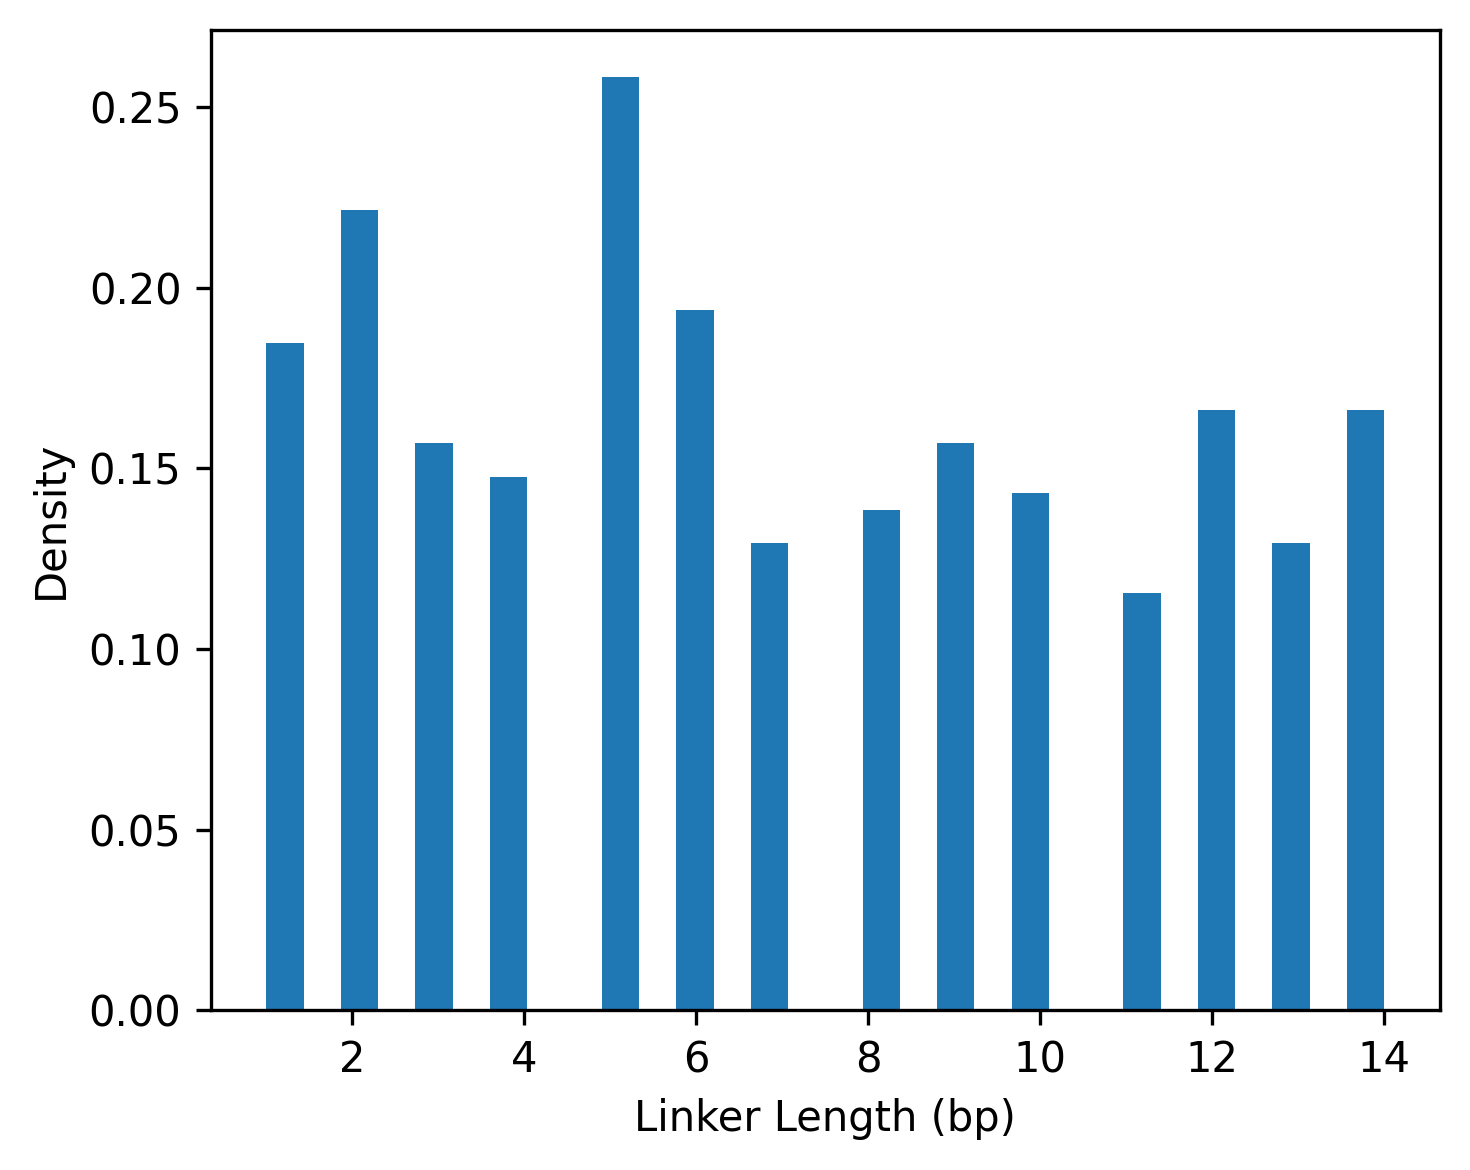

In [11]:
# Plot the linker length distribution
nbins = 30
plt.figure(figsize=(5,4), dpi=300)
plt.hist(linker_lengths, bins=nbins, density=True)
plt.xlabel("Linker Length (bp)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

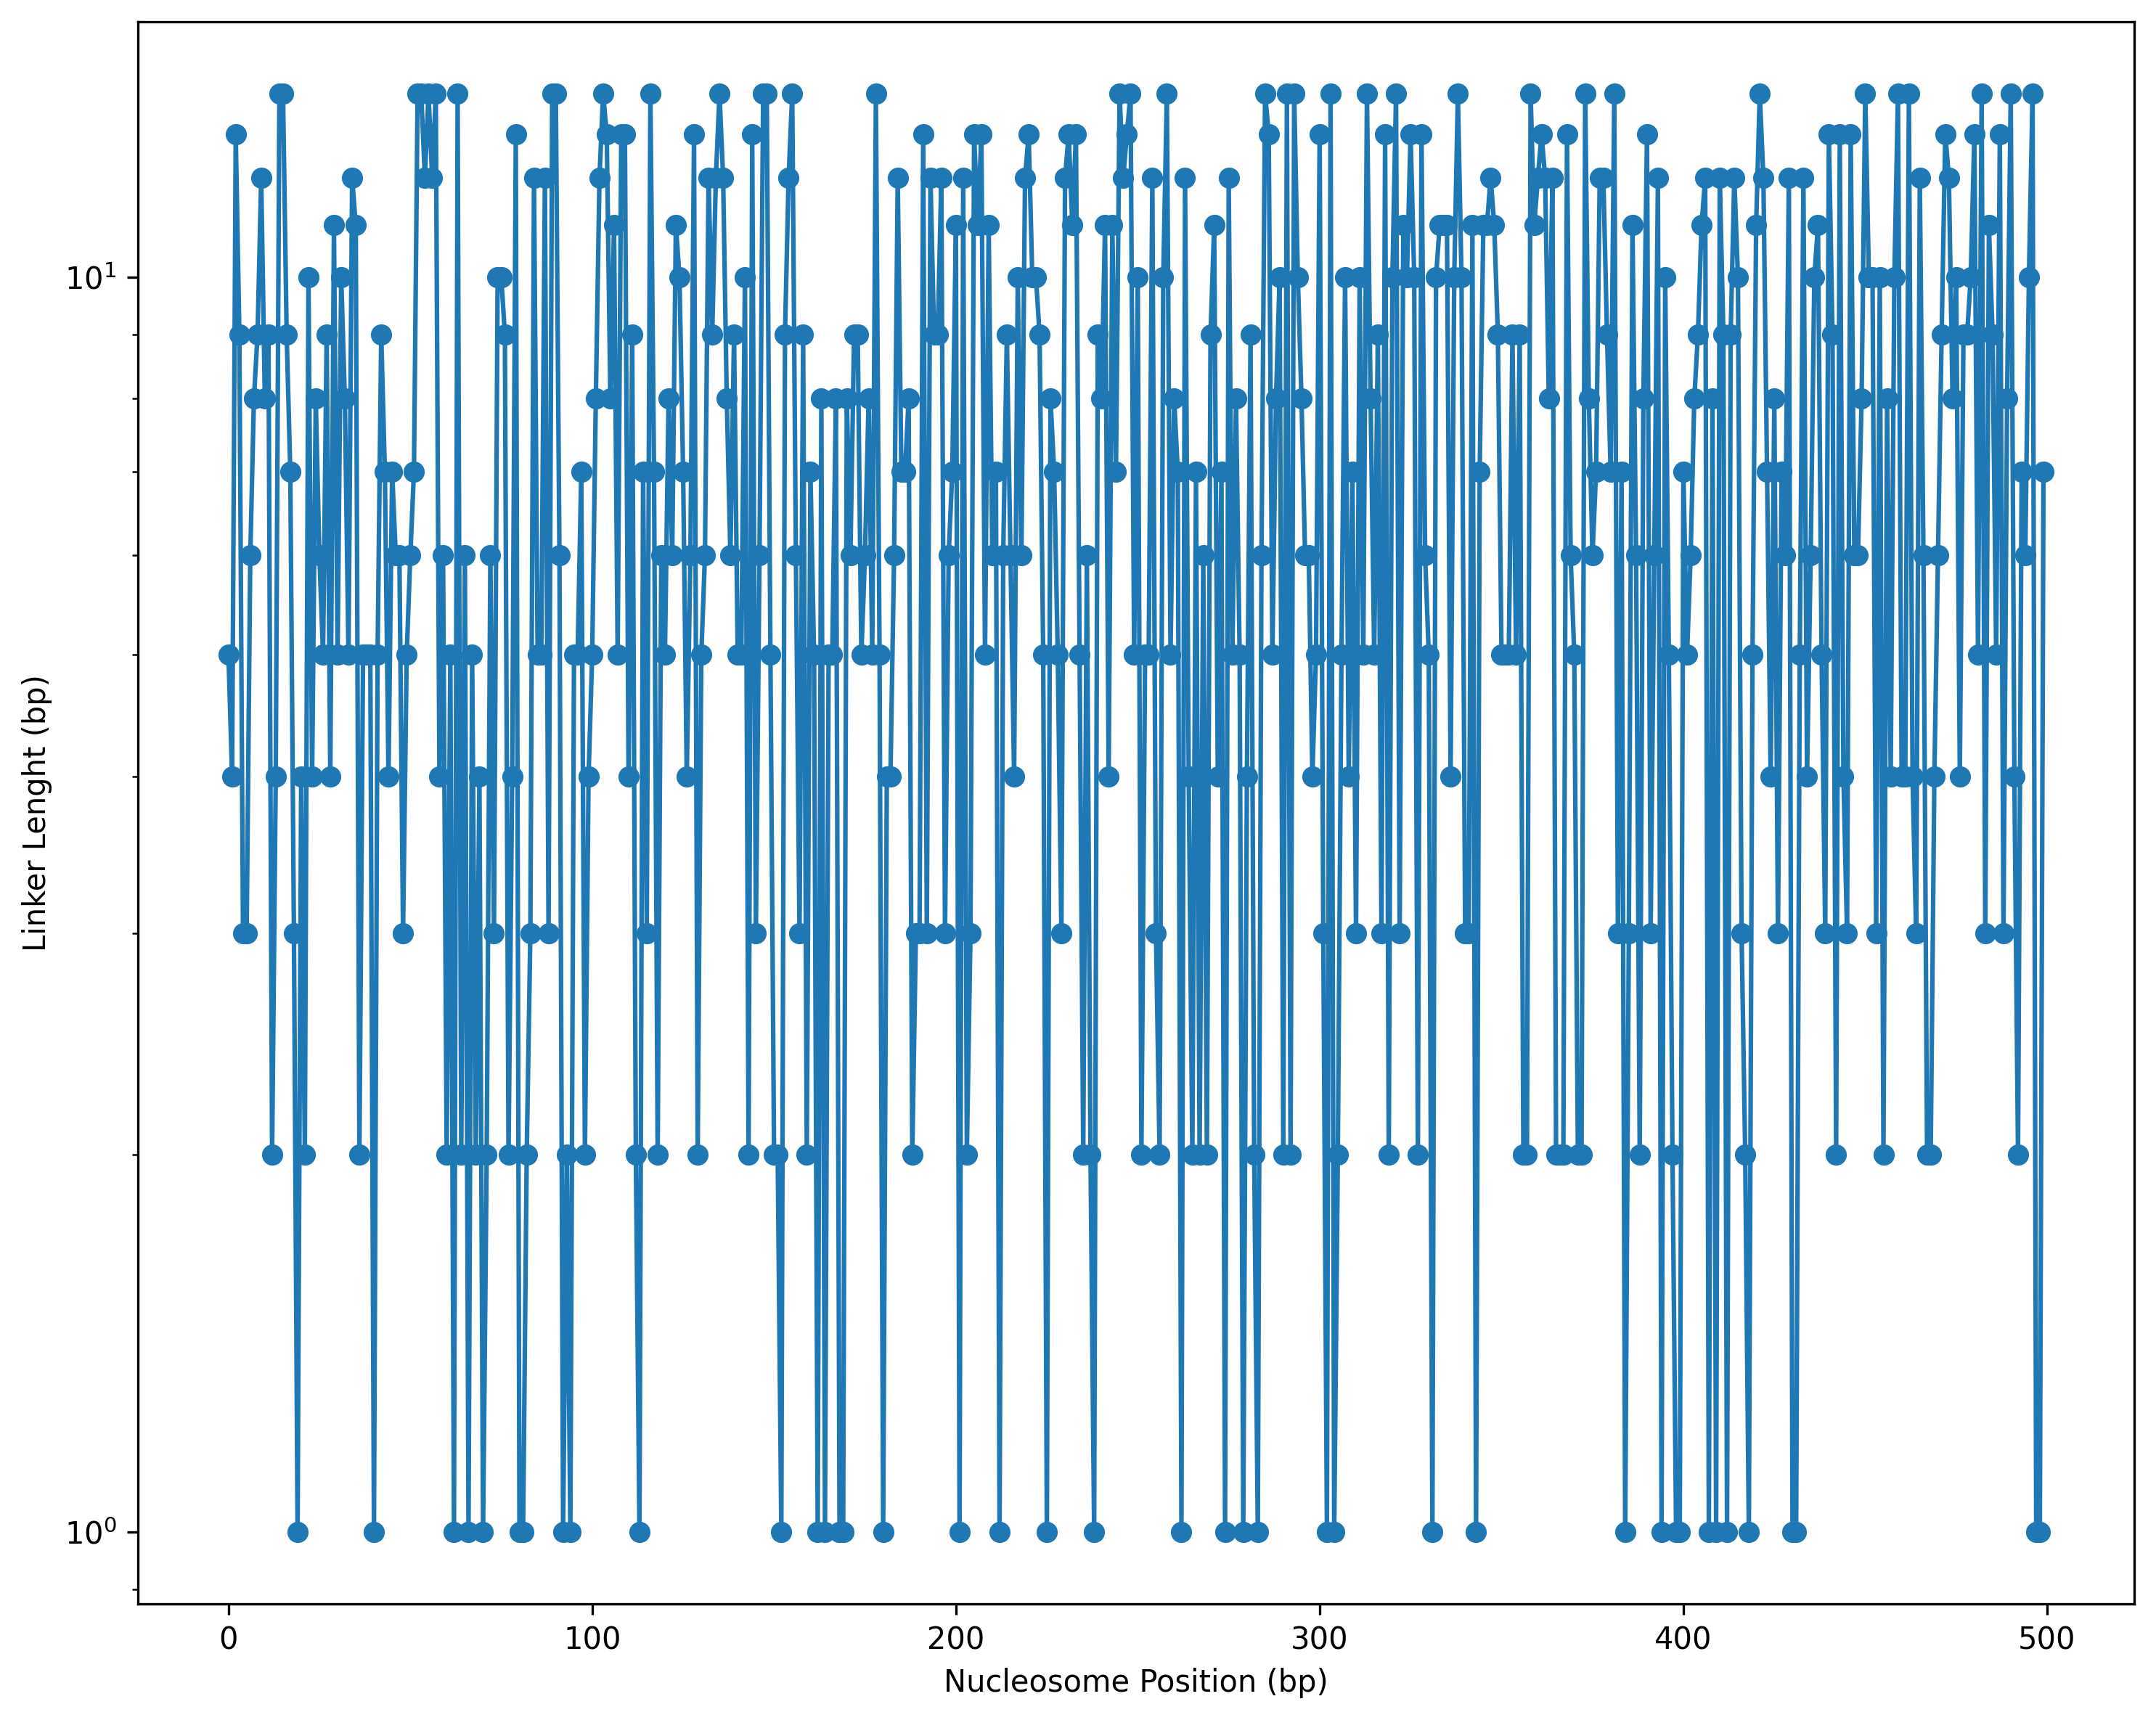

In [12]:
# Plot linker length profile
plt.figure(figsize=(10, 8), dpi=300)
plt.plot(linker_lengths, 'o-')
plt.yscale('log')
plt.xlabel("Nucleosome Position (bp)")
plt.ylabel("Linker Lenght (bp)")
plt.tight_layout()
plt.show()